In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv("CSV/UCI_Credit_Card.csv")
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [3]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
data.isnull().sum()/data.shape[0]

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

### Downsampling

In [5]:
data["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [84]:
data_default = data.loc[data["default.payment.next.month"]==1]
data_default

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,22,120000.0,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000.0,1,2,1,34,3,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [98]:
data_not_default = data.sample(n=len(data_default))
data_not_default.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10054,10055,30000.0,1,1,2,26,1,-1,-1,-2,...,0.0,0.0,0.0,780.0,0.0,8000.0,0.0,0.0,0.0,0
28776,28777,50000.0,2,1,1,32,0,0,0,0,...,30547.0,32329.0,31677.0,1500.0,1491.0,1818.0,2600.0,0.0,1400.0,0
4126,4127,240000.0,2,1,1,41,-1,-1,-1,-1,...,2430.0,7792.0,33196.0,16920.0,4774.0,2442.0,7829.0,33361.0,1076.0,0
6091,6092,150000.0,2,3,1,58,-2,-2,-2,-2,...,-7772.0,69762.0,71591.0,4828.0,0.0,0.0,77534.0,2991.0,4509.0,0
15968,15969,140000.0,2,2,1,41,0,0,0,0,...,45661.0,50880.0,49934.0,2500.0,2100.0,2000.0,6000.0,0.0,2000.0,0
4906,4907,340000.0,2,2,1,46,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14336,14337,380000.0,1,1,2,33,0,0,0,0,...,84687.0,84832.0,84576.0,3000.0,3100.0,3500.0,3500.0,3200.0,3000.0,0
7486,7487,100000.0,2,1,1,36,0,0,0,-2,...,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0
25306,25307,200000.0,2,1,2,25,0,0,0,0,...,61450.0,-200.0,-200.0,6700.0,7000.0,3000.0,0.0,0.0,0.0,0
5870,5871,180000.0,2,1,1,30,0,0,0,0,...,161163.0,172190.0,148963.0,7500.0,8000.0,9000.0,14000.0,0.0,5500.0,1


In [99]:
data_downsample = pd.concat([data_default, data_not_default])
data_downsample.sort_values(by=['ID'])
data_downsample = data_downsample.reset_index(drop=True)
data_downsample

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
3,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
4,22,120000.0,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26539,2047,30000.0,2,3,2,40,-1,0,0,-1,...,196.0,46.0,5346.0,7006.0,0.0,196.0,0.0,5300.0,0.0,0
26540,4173,450000.0,1,3,2,41,0,0,0,0,...,201670.0,181345.0,160000.0,10027.0,8517.0,7020.0,6821.0,6027.0,5010.0,0
26541,28333,420000.0,2,2,1,34,0,0,0,0,...,41494.0,41065.0,40666.0,4000.0,2650.0,1043.0,42000.0,40666.0,48424.0,0
26542,26079,210000.0,2,2,2,36,1,-2,-2,-2,...,3066.0,13206.0,10583.0,0.0,212.0,3066.0,13206.0,212.0,0.0,0


### Upsampling

In [4]:
data_default = data.loc[data["default.payment.next.month"]==1]
data_default = pd.concat([data_default, data_default])
data_default

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,22,120000.0,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000.0,1,2,1,34,3,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [5]:
data_not_default = data.loc[data["default.payment.next.month"]==0].sample(n=len(data_default))
data_not_default.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
21717,21718,190000.0,2,1,2,26,1,-1,0,0,...,5034.0,1091.0,0.0,2236.0,3265.0,3060.0,22.0,0.0,0.0,0
6151,6152,50000.0,1,3,2,48,0,0,0,0,...,24873.0,-2132.0,28561.0,3200.0,2581.0,1200.0,2070.0,31500.0,1200.0,0
22826,22827,150000.0,2,1,1,32,0,0,0,-2,...,0.0,0.0,0.0,3525.0,0.0,0.0,0.0,0.0,0.0,0
15157,15158,50000.0,2,2,1,26,0,0,0,0,...,49776.0,50937.0,49956.0,2200.0,2100.0,2000.0,2000.0,2000.0,2300.0,0
19554,19555,280000.0,2,2,1,43,2,-1,-1,-1,...,5280.0,6913.0,-741.0,499.0,1641.0,5280.0,6915.0,0.0,0.0,0
718,719,150000.0,2,1,1,35,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27460,27461,330000.0,1,1,1,50,-2,-2,-2,-2,...,988.0,-12.0,138.0,0.0,0.0,1005.0,12.0,150.0,13.0,0
2050,2051,30000.0,1,2,1,47,1,2,0,0,...,16469.0,16063.0,17295.0,0.0,1253.0,1400.0,0.0,1500.0,0.0,0
2637,2638,390000.0,1,1,2,28,-1,0,0,0,...,44543.0,45631.0,45793.0,15007.0,10529.0,10000.0,1773.0,2000.0,1592.0,0
28227,28228,200000.0,2,2,1,37,0,0,0,0,...,2732.0,1380.0,1380.0,1068.0,1046.0,1006.0,34.0,1386.0,1386.0,0


In [7]:
data_downsample = pd.concat([data_default, data_not_default])
data_downsample.sort_values(by=['ID'])
data_downsample = data_downsample.sample(frac=1).reset_index(drop=True)
data_downsample

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,13351,310000.0,2,1,2,36,-1,-1,-1,-1,...,2905.0,7944.0,13125.0,8619.0,6206.0,2905.0,7944.0,13524.0,16233.0,0
1,13614,340000.0,1,1,2,25,-1,0,0,0,...,181490.0,154478.0,135259.0,10469.0,6618.0,5168.0,5014.0,5398.0,2738.0,1
2,9817,50000.0,2,2,2,53,0,0,0,-1,...,10931.0,11578.0,10547.0,1139.0,1002.0,13359.0,800.0,0.0,426.0,0
3,603,170000.0,1,1,1,53,0,0,0,0,...,17647.0,18015.0,12930.0,1323.0,1196.0,544.0,563.0,629.0,361.0,0
4,6315,140000.0,1,1,2,28,0,0,0,0,...,135151.0,136327.0,136647.0,6400.0,7000.0,5000.0,5200.0,5100.0,5000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26539,11007,60000.0,1,2,2,22,1,3,2,0,...,21423.0,19049.0,18282.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0
26540,15488,60000.0,1,2,2,29,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.0,1
26541,9216,100000.0,1,2,2,26,-1,2,-1,0,...,107.0,107.0,38362.0,0.0,214.0,0.0,107.0,38362.0,1600.0,1
26542,750,50000.0,2,2,2,25,8,7,6,5,...,36374.0,35229.0,34365.0,0.0,0.0,1000.0,0.0,0.0,3000.0,1


### Correlation matrix

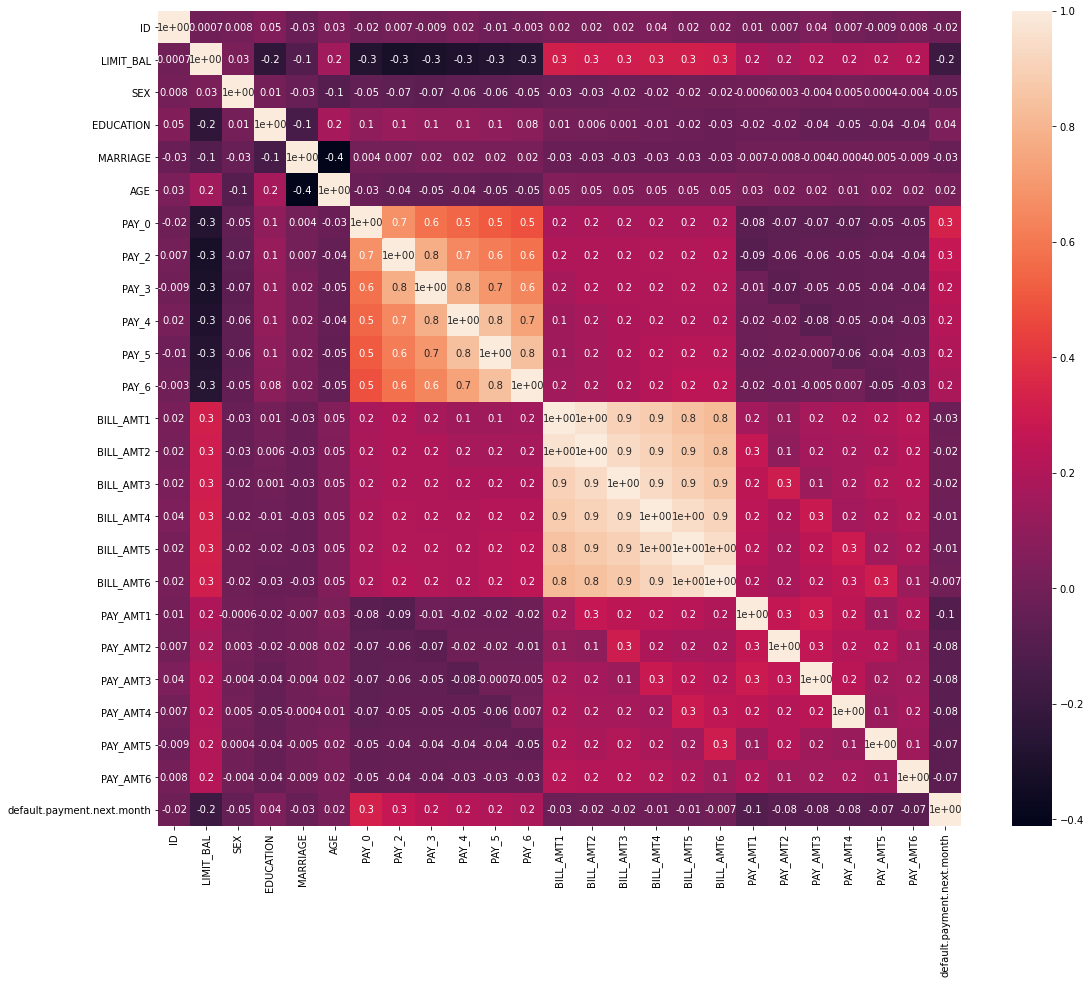

In [9]:
corr = data_downsample.corr()
fig_dims = (18, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr, annot=True, fmt='.1', ax = ax)
plt.show()

### Feature engineering

In [8]:
data_downsample = data_downsample.drop(["ID","SEX","EDUCATION","MARRIAGE","AGE","PAY_4","PAY_5","PAY_6"], axis=1)
X_data = data_downsample.drop("default.payment.next.month", axis=1)
Y_data = data_downsample["default.payment.next.month"]

In [9]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [10]:
#Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X= sc.fit_transform(X_data)

In [116]:
type(X_train)

numpy.ndarray

#### Logistic regression

In [91]:
#Logistic
model = LogisticRegression()

model.fit(X_train, y_train)

predictions_logistic = model.predict(X_test)

In [92]:
print(classification_report(y_test,predictions_logistic))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2648
           1       0.67      0.64      0.66      2661

    accuracy                           0.66      5309
   macro avg       0.66      0.66      0.66      5309
weighted avg       0.66      0.66      0.66      5309



#### Random Forest

In [113]:
clf_forest=RandomForestClassifier(n_estimators=300, max_depth = 100, random_state=42)

clf_forest.fit(X_train, y_train)

importance_forest = clf_forest.feature_importances_
y_pred = clf_forest.predict(X_test)



In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2691
           1       0.84      0.92      0.88      2618

    accuracy                           0.87      5309
   macro avg       0.87      0.87      0.87      5309
weighted avg       0.87      0.87      0.87      5309



In [115]:
scores_randfor = cross_val_score(clf_forest, X, Y_data, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_randfor.mean(), scores_randfor.std()))

0.90 accuracy with a standard deviation of 0.01


Feature: 0 LIMIT_BAL, Score: 0.06896740943665922 
Feature: 1 PAY_0, Score: 0.09875432487707289 
Feature: 2 PAY_2, Score: 0.044371939239364326 
Feature: 3 PAY_3, Score: 0.030410228665327565 
Feature: 4 PAY_4, Score: 0.025345505155830967 
Feature: 5 PAY_5, Score: 0.019120071656732615 
Feature: 6 PAY_6, Score: 0.019309373780813377 
Feature: 7 BILL_AMT1, Score: 0.07449015004730337 
Feature: 8 BILL_AMT2, Score: 0.06355008015849421 
Feature: 9 BILL_AMT3, Score: 0.058391649328108336 
Feature: 10 BILL_AMT4, Score: 0.0563865981062825 
Feature: 11 BILL_AMT5, Score: 0.055698662535051596 
Feature: 12 BILL_AMT6, Score: 0.05643270994518523 
Feature: 13 PAY_AMT1, Score: 0.060717619408670036 
Feature: 14 PAY_AMT2, Score: 0.057845752482551305 
Feature: 15 PAY_AMT3, Score: 0.05536777497023969 
Feature: 16 PAY_AMT4, Score: 0.05072104252882812 
Feature: 17 PAY_AMT5, Score: 0.05089095008507494 
Feature: 18 PAY_AMT6, Score: 0.05322815759240968 


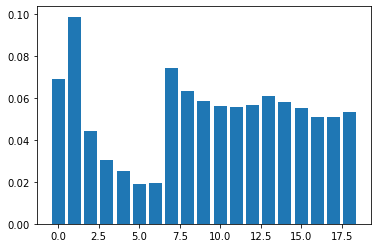

In [80]:
for i,v in enumerate(importance_forest):
    print('Feature: {} {}, Score: {} '.format(i,data_downsample.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_forest))], importance_forest)
plt.show()

#### Decision tree

In [52]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", random_state=42, splitter="best")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
#Predict the response for test dataset
predictions = clf.predict(X_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2678
           1       0.76      0.91      0.83      2631

    accuracy                           0.82      5309
   macro avg       0.83      0.82      0.81      5309
weighted avg       0.83      0.82      0.81      5309



In [59]:
scores_tree = cross_val_score(clf, X, Y_data, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_tree.mean(), scores_tree.std()))

0.84 accuracy with a standard deviation of 0.00


Feature: ID, Score: 0.07002528370737587 
Feature: LIMIT_BAL, Score: 0.06340977253886845 
Feature: SEX, Score: 0.007882992318778169 
Feature: EDUCATION, Score: 0.021462497160897025 
Feature: MARRIAGE, Score: 0.013006597817501572 
Feature: AGE, Score: 0.05798581767379276 
Feature: PAY_0, Score: 0.15745129883083456 
Feature: PAY_2, Score: 0.010319371670668596 
Feature: PAY_3, Score: 0.012286658282642193 
Feature: PAY_4, Score: 0.006229186862509251 
Feature: PAY_5, Score: 0.015719797121265748 
Feature: PAY_6, Score: 0.00959910859422792 
Feature: BILL_AMT1, Score: 0.05656972959848533 
Feature: BILL_AMT2, Score: 0.05164933503293009 
Feature: BILL_AMT3, Score: 0.040218445795160325 
Feature: BILL_AMT4, Score: 0.035633947150802626 
Feature: BILL_AMT5, Score: 0.04347121292897422 
Feature: BILL_AMT6, Score: 0.048766593028344365 
Feature: PAY_AMT1, Score: 0.04663112873679638 
Feature: PAY_AMT2, Score: 0.042522849950377674 
Feature: PAY_AMT3, Score: 0.06594272939942515 
Feature: PAY_AMT4, Score: 0.

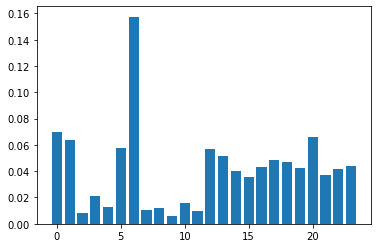

In [72]:
for i,v in enumerate(importance):
    print('Feature: {}, Score: {} '.format(data.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Gradient boosting

In [11]:
gbk = GradientBoostingClassifier()

gbk.fit(X_train, y_train)
importance_gbk = gbk.feature_importances_
gbk_pred = gbk.predict(X_test)

In [12]:
print(classification_report(y_test,gbk_pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      2657
           1       0.76      0.63      0.69      2652

    accuracy                           0.72      5309
   macro avg       0.72      0.72      0.71      5309
weighted avg       0.72      0.72      0.71      5309



In [13]:
scores_grad = cross_val_score(gbk, X, Y_data, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_grad.mean(), scores_grad.std()))

0.72 accuracy with a standard deviation of 0.01


Feature: ID, Score: 0.010844217067276566 
Feature: LIMIT_BAL, Score: 0.05075165984730359 
Feature: SEX, Score: 0.00315800629991096 
Feature: EDUCATION, Score: 0.010719410110156778 
Feature: MARRIAGE, Score: 0.004781125721590716 
Feature: AGE, Score: 0.010278774710478033 
Feature: PAY_0, Score: 0.5250076014346022 
Feature: PAY_2, Score: 0.03578466836218727 
Feature: PAY_3, Score: 0.029799042835184628 
Feature: PAY_4, Score: 0.019227752851134792 
Feature: PAY_5, Score: 0.01728868385546636 
Feature: PAY_6, Score: 0.01736384900929055 
Feature: BILL_AMT1, Score: 0.03816956377850918 
Feature: BILL_AMT2, Score: 0.025729505130874616 
Feature: BILL_AMT3, Score: 0.012474810585452464 
Feature: BILL_AMT4, Score: 0.012517340633087593 
Feature: BILL_AMT5, Score: 0.004966939126720785 
Feature: BILL_AMT6, Score: 0.008853322616247999 
Feature: PAY_AMT1, Score: 0.027226106683370735 
Feature: PAY_AMT2, Score: 0.04319058895690859 
Feature: PAY_AMT3, Score: 0.043183979754176455 
Feature: PAY_AMT4, Score: 0

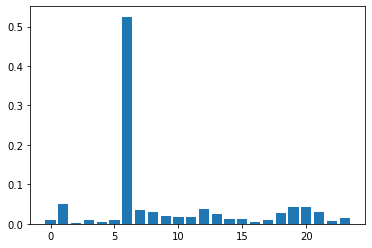

In [75]:
for i,v in enumerate(importance_gbk):
    print('Feature: {}, Score: {} '.format(data.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_gbk))], importance_gbk)
plt.show()

#### KNN

In [66]:
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

knn_pred = model_knn.predict(X_test)

In [67]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2678
           1       0.69      0.71      0.70      2631

    accuracy                           0.70      5309
   macro avg       0.70      0.70      0.70      5309
weighted avg       0.70      0.70      0.70      5309



In [68]:
scores_grad = cross_val_score(model_knn, X, Y_data, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_grad.mean(), scores_grad.std()))

0.72 accuracy with a standard deviation of 0.01
